In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('preprocessed_telco_customer_data.csv')
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


In [3]:
churn_rate = data['Churn'].mean() * 100
churn_rate


26.536987079369588

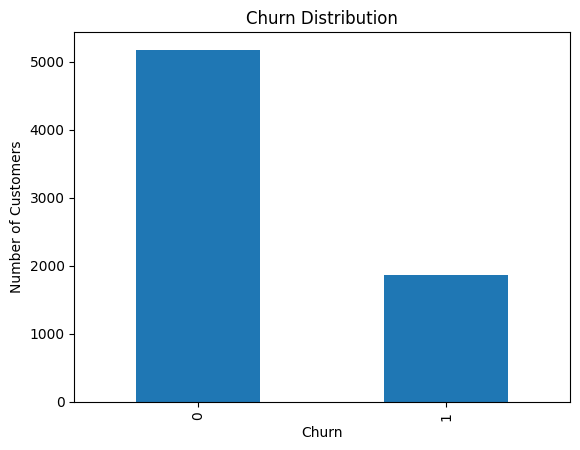

In [4]:
data['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution')
plt.show()

In [5]:
gender_churn = data.groupby('gender_Male')['Churn'].mean()
gender_churn


gender_Male
False    0.269209
True     0.261603
Name: Churn, dtype: float64

In [6]:
senior_churn = data.groupby('SeniorCitizen')['Churn'].mean()
senior_churn


SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

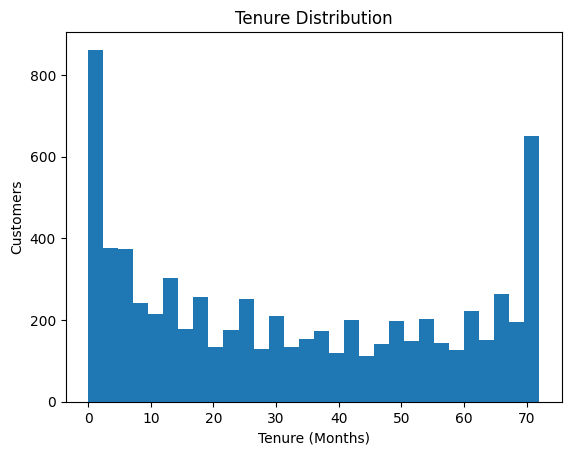

In [7]:
plt.hist(data['tenure'], bins=30)
plt.xlabel('Tenure (Months)')
plt.ylabel('Customers')
plt.title('Tenure Distribution')
plt.show()


In [21]:
tenure_churn = data.groupby('Churn')['tenure'].mean()
tenure_churn


Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

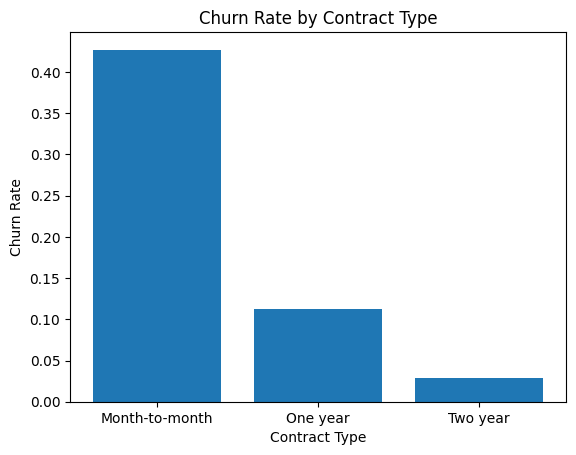

In [9]:
contract_churn = {
    'Month-to-month': data.loc[
        (data['Contract_One year'] == 0) & (data['Contract_Two year'] == 0),
        'Churn'
    ].mean(),
    'One year': data.loc[data['Contract_One year'] == 1, 'Churn'].mean(),
    'Two year': data.loc[data['Contract_Two year'] == 1, 'Churn'].mean()
}

contract_churn
plt.bar(contract_churn.keys(), contract_churn.values())
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

PaymentMethod_Electronic check : 0.4528541226215645
PaymentMethod_Mailed check : 0.19106699751861042
PaymentMethod_Credit card (automatic) : 0.15243101182654403
PaymentMethod_Bank transfer (automatic): 0.16709844559585493


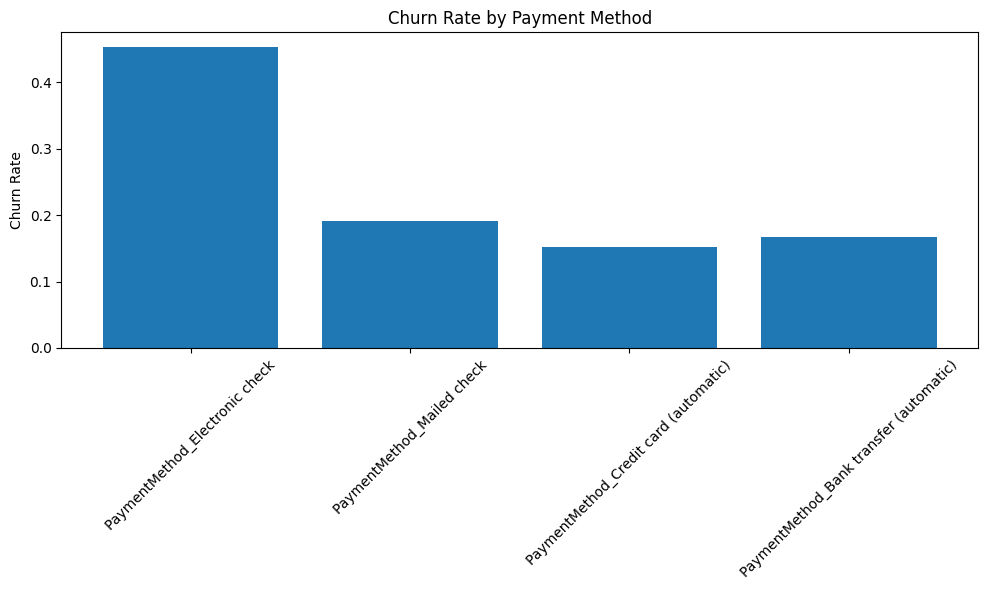

In [19]:
payment_cols = [
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
    'PaymentMethod_Credit card (automatic)'
]

for col in payment_cols:
    print(col, ":", data.loc[data[col] == 1, 'Churn'].mean())

bank_transfer_mask = (data[payment_cols].sum(axis=1) == 0)
print(
    'PaymentMethod_Bank transfer (automatic):',
    data.loc[bank_transfer_mask, 'Churn'].mean()
)
payment_cols
plt.figure(figsize=(10, 6))
payment_churn = {
    col: data.loc[data[col] == 1, 'Churn'].mean() for col in payment_cols
}
payment_churn['PaymentMethod_Bank transfer (automatic)'] = data.loc[bank_transfer_mask, 'Churn'].mean()
plt.bar(payment_churn.keys(), payment_churn.values())
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

In [16]:
data.groupby('Churn')['MonthlyCharges'].mean()


Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64